In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
# using inbuilt dataset 
from pycaret.datasets import get_data
data = get_data('credit')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [60]:
from pycaret.classification import * # importing all the classification algorithm that pycaret have

### Basic Feature Engineering

In [61]:
s=setup(data=data,target='default',train_size=0.6) 

Setup Succesfully Completed!


,Description,Value
0,session_id,6843
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(24000, 24)"
4,Missing Values,False
5,Numeric Features,14
6,Categorical Features,9
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


### Comparing Models

In [62]:
c=compare_models() # comparing all the present models 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Ridge Classifier,0.8223,0.0000,0.3605,0.6871,0.4728,0.3782,0.4067,0.0779
1,Linear Discriminant Analysis,0.8219,0.7629,0.3769,0.6738,0.4832,0.3859,0.4098,0.3808
2,Ada Boost Classifier,0.8214,0.7742,0.3565,0.6844,0.4685,0.3738,0.4027,3.5577
3,Gradient Boosting Classifier,0.8214,0.7797,0.3596,0.6825,0.4709,0.3756,0.4036,11.0987
4,CatBoost Classifier,0.8199,0.7788,0.3690,0.6684,0.4753,0.3774,0.4018,37.1521
5,Light Gradient Boosting Machine,0.8177,0.7737,0.3643,0.6592,0.4690,0.3698,0.3937,0.8139
6,Extreme Gradient Boosting,0.8099,0.7639,0.3646,0.6185,0.4583,0.3524,0.3707,9.6419
7,Extra Trees Classifier,0.8064,0.7360,0.3693,0.6014,0.4573,0.3477,0.3631,2.9334
8,Random Forest Classifier,0.8062,0.7282,0.3197,0.6216,0.4218,0.3195,0.3453,0.3395
9,Logistic Regression,0.7792,0.6565,0.0035,0.5333,0.0068,0.0044,0.0308,0.6097


In [ ]:
# The yellow blocks descrbes the best parameter among all oother parameters 

### Creating Models

In [66]:
ridge_class=create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8264,0.0000,0.3711,0.7024,0.4856,0.3929,0.4219
1,0.8229,0.0000,0.3585,0.6909,0.4720,0.3782,0.4077
2,0.8188,0.0000,0.3711,0.6592,0.4748,0.3755,0.3982
3,0.8118,0.0000,0.3239,0.6478,0.4319,0.3338,0.3626
4,0.8285,0.0000,0.3679,0.7178,0.4865,0.3961,0.4280
5,0.8160,0.0000,0.3396,0.6626,0.4491,0.3521,0.3805
6,0.8292,0.0000,0.3793,0.7160,0.4959,0.4045,0.4342
7,0.8118,0.0000,0.3542,0.6348,0.4547,0.3519,0.3738
8,0.8424,0.0000,0.4107,0.7706,0.5358,0.4513,0.4837
9,0.8153,0.0000,0.3292,0.6688,0.4412,0.3455,0.3768


In [67]:
print(ridge_class)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=6843,
                solver='auto', tol=0.001)


In [6]:
linear_da=create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8132,0.7659,0.3333,0.6503,0.4407,0.3423,0.3699
1,0.8333,0.7799,0.4182,0.7074,0.5257,0.4326,0.4546
2,0.8174,0.7611,0.3302,0.6774,0.4440,0.3499,0.3823
3,0.8368,0.7878,0.4277,0.7196,0.5365,0.4451,0.4673
4,0.8236,0.7515,0.3868,0.6758,0.4920,0.3947,0.4172
5,0.8201,0.7515,0.4119,0.6453,0.5029,0.3995,0.4146
6,0.8160,0.7337,0.3730,0.6467,0.4732,0.3713,0.3919
7,0.8292,0.7907,0.3981,0.7017,0.5080,0.4140,0.4384
8,0.8306,0.7816,0.4357,0.6847,0.5326,0.4353,0.4519
9,0.8194,0.7787,0.3730,0.6648,0.4779,0.3790,0.4022


In [18]:
print(linear_da)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)


In [7]:
decision_tree=create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7111,0.5946,0.3868,0.3576,0.3716,0.1844,0.1847
1,0.7347,0.6197,0.4151,0.4024,0.4087,0.2377,0.2378
2,0.7194,0.6149,0.4277,0.3799,0.4024,0.2199,0.2206
3,0.7431,0.6470,0.4748,0.4266,0.4494,0.2825,0.2831
4,0.7243,0.6193,0.4277,0.3875,0.4066,0.2276,0.2281
5,0.7243,0.6169,0.4245,0.3868,0.4048,0.2259,0.2263
6,0.7264,0.6168,0.4201,0.3907,0.4048,0.2275,0.2278
7,0.7229,0.6135,0.4169,0.3844,0.4000,0.2203,0.2206
8,0.7389,0.6396,0.4577,0.4183,0.4371,0.2676,0.2680
9,0.7160,0.5991,0.3856,0.3661,0.3756,0.1919,0.1920


In [16]:
print(decision_tree)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5957, splitter='best')


In [8]:
random_fc=create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8021,0.7226,0.2925,0.6078,0.3949,0.2935,0.3217
1,0.8062,0.7194,0.3019,0.6275,0.4076,0.3084,0.3380
2,0.8056,0.7172,0.2956,0.6267,0.4017,0.3030,0.3336
3,0.8118,0.7494,0.3711,0.6243,0.4655,0.3601,0.3781
4,0.8160,0.7249,0.3616,0.6497,0.4646,0.3642,0.3871
5,0.8125,0.7148,0.3585,0.6333,0.4578,0.3548,0.3759
6,0.8007,0.7237,0.2947,0.6026,0.3958,0.2929,0.3198
7,0.8069,0.7331,0.3260,0.6228,0.4280,0.3253,0.3499
8,0.8236,0.7565,0.4075,0.6667,0.5058,0.4060,0.4242
9,0.7979,0.7311,0.3166,0.5805,0.4097,0.3003,0.3204


In [19]:
print(random_fc)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=5957, verbose=0,
                       warm_start=False)


### Model Tuning

In [21]:
# This tune_model() method will tune the hyperparameters to give the best result. we can check the hyperparameters before and after tuning

In [69]:
tune_ridge=tune_model(ridge_class)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8264,0.0000,0.3711,0.7024,0.4856,0.3929,0.4219
1,0.8229,0.0000,0.3585,0.6909,0.4720,0.3782,0.4077
2,0.8188,0.0000,0.3711,0.6592,0.4748,0.3755,0.3982
3,0.8125,0.0000,0.3270,0.6500,0.4351,0.3372,0.3658
4,0.8285,0.0000,0.3679,0.7178,0.4865,0.3961,0.4280
5,0.8160,0.0000,0.3396,0.6626,0.4491,0.3521,0.3805
6,0.8292,0.0000,0.3793,0.7160,0.4959,0.4045,0.4342
7,0.8118,0.0000,0.3542,0.6348,0.4547,0.3519,0.3738
8,0.8424,0.0000,0.4107,0.7706,0.5358,0.4513,0.4837
9,0.8153,0.0000,0.3292,0.6688,0.4412,0.3455,0.3768


In [ ]:
print(tune_ridge)

In [13]:
tune_linear_da=tune_model(linear_da)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8132,0.7654,0.3333,0.6503,0.4407,0.3423,0.3699
1,0.8340,0.7796,0.4151,0.7135,0.5249,0.4327,0.4560
2,0.8174,0.7610,0.3302,0.6774,0.4440,0.3499,0.3823
3,0.8347,0.7875,0.4308,0.7062,0.5352,0.4417,0.4617
4,0.8208,0.7528,0.3774,0.6667,0.4819,0.3835,0.4062
5,0.8201,0.7521,0.4119,0.6453,0.5029,0.3995,0.4146
6,0.8146,0.7338,0.3730,0.6398,0.4713,0.3682,0.3879
7,0.8292,0.7905,0.4013,0.6995,0.5100,0.4156,0.4391
8,0.8319,0.7816,0.4389,0.6897,0.5364,0.4399,0.4567
9,0.8188,0.7787,0.3730,0.6611,0.4770,0.3775,0.4001


In [17]:
print(tune_linear_da)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='lsqr', store_covariance=False, tol=0.0001)


In [14]:
tune_decision_tree=tune_model(decision_tree)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7799,0.6931,0.3333,0.5024,0.4008,0.2726,0.2812
1,0.7944,0.7078,0.3239,0.5598,0.4104,0.2965,0.3128
2,0.7819,0.6859,0.3082,0.5104,0.3843,0.2615,0.2738
3,0.8076,0.7412,0.4088,0.5936,0.4842,0.3708,0.3806
4,0.7889,0.6831,0.3585,0.5327,0.4286,0.3051,0.3141
5,0.7972,0.7231,0.3616,0.5637,0.4406,0.3239,0.3358
6,0.7903,0.6888,0.3417,0.5423,0.4192,0.2992,0.3111
7,0.8007,0.7232,0.3856,0.5748,0.4615,0.3450,0.3554
8,0.7993,0.7318,0.3417,0.5798,0.4300,0.3179,0.3343
9,0.7958,0.7192,0.3574,0.5616,0.4368,0.3195,0.3317


In [15]:
print(tune_decision_tree)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=63, max_features=9, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5957, splitter='best')


In [20]:
tune_random_fc=tune_model(random_fc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8160,0.7762,0.3459,0.6587,0.4536,0.3556,0.3823
1,0.8250,0.7694,0.3648,0.6988,0.4793,0.3864,0.4159
2,0.8160,0.7688,0.3302,0.6688,0.4421,0.3467,0.3778
3,0.8382,0.8024,0.4371,0.7202,0.5440,0.4527,0.4736
4,0.8174,0.7448,0.3711,0.6519,0.4729,0.3724,0.3941
5,0.8236,0.7629,0.4025,0.6667,0.5020,0.4026,0.4216
6,0.8181,0.7571,0.3699,0.6592,0.4739,0.3742,0.3971
7,0.8292,0.7993,0.4107,0.6931,0.5157,0.4202,0.4414
8,0.8271,0.7971,0.4263,0.6733,0.5221,0.4229,0.4394
9,0.8153,0.7547,0.3605,0.6497,0.4637,0.3630,0.3860


In [22]:
print(tune_random_fc)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=5957, verbose=0,
                       warm_start=False)


In [ ]:
# similarly we can create all other models and we can compare them.

### Plots

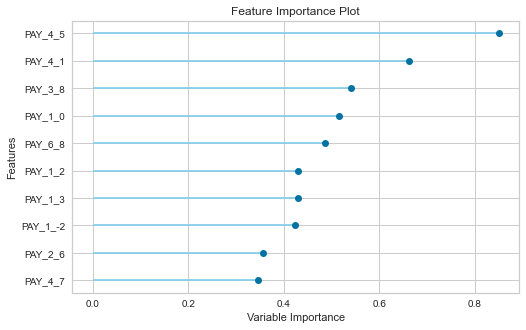

In [70]:
# for ridge classifier
plot_model(tune_ridge, plot='feature')

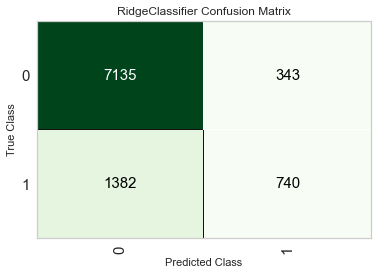

In [71]:
plot_model(tune_ridge, plot = 'confusion_matrix')

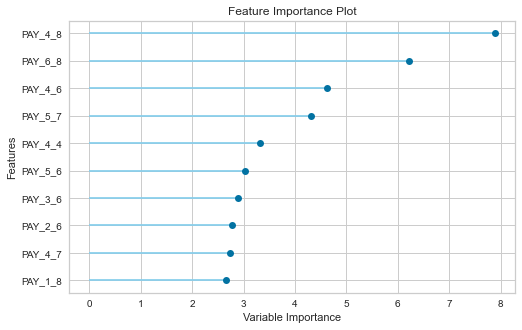

In [36]:
# for linear discriminant analysis
plot_model(tune_linear_da, plot='feature')

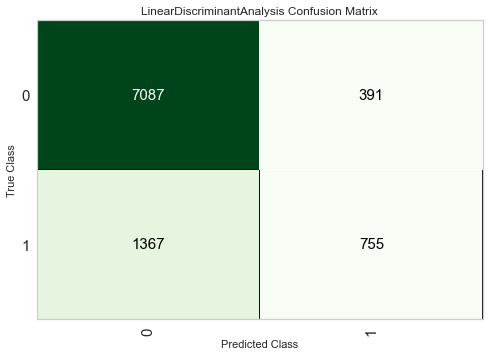

In [37]:
plot_model(tune_linear_da, plot = 'confusion_matrix')

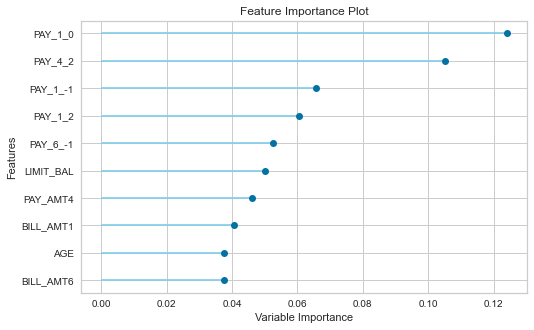

In [34]:
# for decision tree
plot_model(tune_decision_tree, plot='feature')

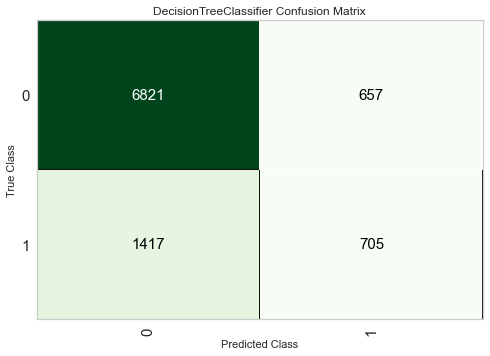

In [38]:
plot_model(tune_decision_tree, plot = 'confusion_matrix')

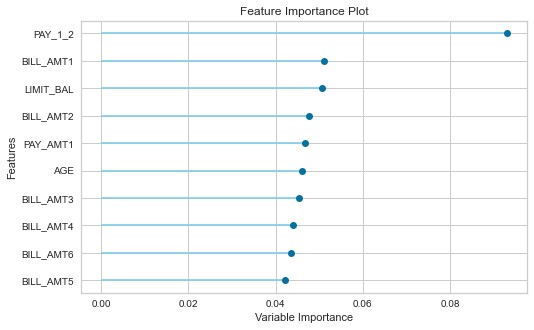

In [40]:
#for random forest
plot_model(tune_random_fc, plot='feature')

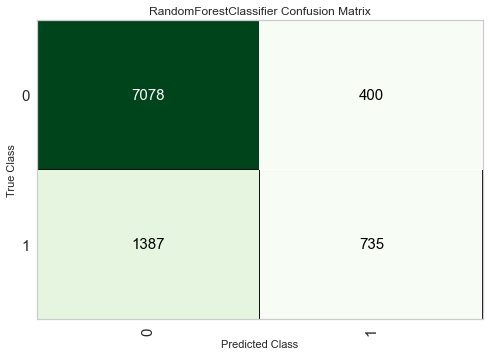

In [41]:
plot_model(tune_random_fc, plot = 'confusion_matrix')

In [ ]:
# we can add more visualization techniques from pycaret

### Predicted values (test values)

In [72]:
predict0=predict_model(tune_ridge)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.8203,0,0.3487,0.6833,0.4618,0.3673,0.3972


In [73]:
predict0.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,default,Label
0,180000.0,25.0,120583.0,97341.0,87773.0,89547.0,91639.0,93991.0,3507.0,3201.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,180000.0,42.0,102449.0,104807.0,111048.0,107782.0,110879.0,113666.0,5500.0,9500.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,140000.0,31.0,1399.0,1519.0,1404.0,540.0,0.0,0.0,1519.0,1404.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,30000.0,24.0,28510.0,28481.0,28045.0,27259.0,0.0,0.0,2000.0,1200.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4,330000.0,24.0,341499.0,334929.0,317997.0,274132.0,267622.0,261246.0,12500.0,10882.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [45]:
predict1=predict_model(tune_linear_da)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.8169,0.7625,0.3558,0.6588,0.4621,0.3634,0.3884


In [46]:
predict1.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,default,Label,Score
0,50000.0,36.0,43900.0,42499.0,17494.0,18178.0,18541.0,18929.0,2268.0,1604.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0986
1,200000.0,26.0,47236.0,45200.0,35939.0,34096.0,34876.0,34615.0,1800.0,1603.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0652
2,80000.0,25.0,3377.0,3377.0,3476.0,3377.0,3377.0,5062.0,3377.0,3476.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0886
3,30000.0,37.0,21368.0,22194.0,18098.0,14542.0,15758.0,13149.0,1500.0,1400.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.9534
4,30000.0,24.0,26581.0,27080.0,26759.0,27186.0,27208.0,27234.0,1500.0,1445.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0762


In [47]:
predict2=predict_model(tune_decision_tree)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.784,0.6963,0.3322,0.5176,0.4047,0.2803,0.2906


In [54]:
predict2.tail()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,default,Label,Score
9595,150000.0,33.0,20441.0,26417.0,1091.0,5933.0,1517.0,1787.0,6549.0,1096.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.000
9596,50000.0,51.0,38434.0,39492.0,39394.0,33490.0,27316.0,0.0,1681.0,1583.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.175
9597,400000.0,24.0,187790.0,176294.0,190256.0,89128.0,39276.0,23440.0,5519.0,44776.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.000
9598,360000.0,26.0,4183.0,6469.0,465.0,4251.0,1668.0,2284.0,6501.0,467.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.000
9599,90000.0,29.0,79063.0,64135.0,46678.0,85156.0,43269.0,44181.0,3687.0,1997.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.000


In [50]:
predict3=predict_model(tune_random_fc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8139,0.7621,0.3464,0.6476,0.4513,0.3514,0.3764


In [53]:
predict3.tail()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,default,Label,Score
9595,150000.0,33.0,20441.0,26417.0,1091.0,5933.0,1517.0,1787.0,6549.0,1096.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0710
9596,50000.0,51.0,38434.0,39492.0,39394.0,33490.0,27316.0,0.0,1681.0,1583.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0909
9597,400000.0,24.0,187790.0,176294.0,190256.0,89128.0,39276.0,23440.0,5519.0,44776.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0941
9598,360000.0,26.0,4183.0,6469.0,465.0,4251.0,1668.0,2284.0,6501.0,467.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.1138
9599,90000.0,29.0,79063.0,64135.0,46678.0,85156.0,43269.0,44181.0,3687.0,1997.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.1141


In [ ]:
# now just provide the data set and get the answer.